In [57]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse_drug = pd.read_csv(mouse_drug_data_to_load)
df_clinical_trial = pd.read_csv(clinical_trial_data_to_load)
print(df_mouse_drug.head(10))
print(df_mouse_drug.shape)
print()
print(df_clinical_trial.head(10))
print(df_clinical_trial.shape)
print()
print(len(df_mouse_drug["Mouse ID"].unique()))
print(len(df_clinical_trial["Mouse ID"].unique()))

import collections
# Check if they share exactly the same Mouse IDs
assert collections.Counter(df_mouse_drug["Mouse ID"].unique()) == collections.Counter(df_clinical_trial["Mouse ID"].unique())

  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn
5     o848  Stelasyn
6     z314  Stelasyn
7     g989  Stelasyn
8     m269  Stelasyn
9     a963  Stelasyn
(250, 2)

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
5     h246          0                45.0                 0
6     p189          0                45.0                 0
7     n923          0                45.0                 0
8     q119          0                45.0                 0
9     f993          0                45.0                 0
(1893, 4)

249
249


In [58]:
# Combine the data into a single dataset
df_combined = pd.merge(df_clinical_trial, df_mouse_drug, how="left", on="Mouse ID")

# Display the data table for preview
df_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [59]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
Mouse ID              1906 non-null object
Timepoint             1906 non-null int64
Tumor Volume (mm3)    1906 non-null float64
Metastatic Sites      1906 non-null int64
Drug                  1906 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 89.3+ KB


In [60]:
df_combined.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


## Tumor Response to Treatment

In [61]:
series_mean_tumor_volume = df_combined.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
#series_mean_tumor_volume.head(15)

df_mean_tumor_volume = series_mean_tumor_volume.to_frame().reset_index()
df_mean_tumor_volume.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [62]:
series_error_of_tumor_volumes = df_combined.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
#series_error_of_tumor_volumes.head()

df_error_of_tumor_volumes = series_error_of_tumor_volumes.to_frame().reset_index()
df_error_of_tumor_volumes.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [63]:
df_pivot = df_mean_tumor_volume.pivot_table("Tumor Volume (mm3)", index="Timepoint", columns="Drug")
df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


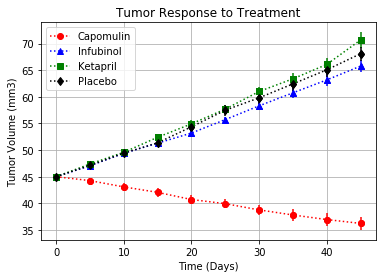

In [64]:
name_list = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
color_list = ["r", "b", "g", "k"]
fmt_list = ["o", "^", "s", "d"]

for i in range(len(name_list)):
    plt.plot(
        df_mean_tumor_volume[df_mean_tumor_volume["Drug"] == name_list[i]]["Timepoint"],
        df_mean_tumor_volume[df_mean_tumor_volume["Drug"] == name_list[i]]["Tumor Volume (mm3)"],
        color_list[i] + ":" + fmt_list[i],
    )
    
    plt.errorbar(
        df_mean_tumor_volume[df_mean_tumor_volume["Drug"] == name_list[i]]["Timepoint"],
        df_mean_tumor_volume[df_mean_tumor_volume["Drug"] == name_list[i]]["Tumor Volume (mm3)"],
        yerr=df_error_of_tumor_volumes[df_error_of_tumor_volumes["Drug"] == name_list[i]]["Tumor Volume (mm3)"],
        fmt=fmt_list[i],
        ecolor = color_list[i],
        color = color_list[i],
    )

plt.grid()
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.legend(labels=["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="upper left")

import os
plt.savefig(os.getcwd() + "/images/tumor_response.png")
plt.show()

## Metastatic Response to Treatment

In [65]:
series_mean_met_sites = df_combined.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
series_mean_met_sites.head()

df_mean_met_sites = series_mean_met_sites.to_frame()
df_mean_met_sites.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [66]:
series_error_met_sites = df_combined.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

df_error_met_sites = series_error_met_sites.to_frame()
df_error_met_sites.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [67]:
df_pivot = df_mean_met_sites.pivot_table("Metastatic Sites", index="Timepoint", columns="Drug")
df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


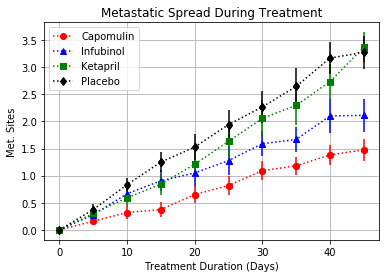

In [68]:
df_mean_met_sites = df_mean_met_sites.reset_index()
df_error_met_sites = df_error_met_sites.reset_index()

for i in range(len(name_list)):
    plt.plot(
        df_mean_met_sites[df_mean_met_sites["Drug"] == name_list[i]]["Timepoint"],
        df_mean_met_sites[df_mean_met_sites["Drug"] == name_list[i]]["Metastatic Sites"],
        color_list[i] + ":" + fmt_list[i],
    )
    
    plt.errorbar(
        df_mean_met_sites[df_mean_met_sites["Drug"] == name_list[i]]["Timepoint"],
        df_mean_met_sites[df_mean_met_sites["Drug"] == name_list[i]]["Metastatic Sites"],
        yerr=df_error_met_sites[df_error_met_sites["Drug"] == name_list[i]]["Metastatic Sites"],
        fmt=fmt_list[i],
        ecolor = color_list[i],
        color = color_list[i],
    )

plt.grid()
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")
plt.legend(labels=["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="upper left")

plt.savefig(os.getcwd() + "/images/metastatic_spread.png")
plt.show()

## Survival Rates

In [69]:
series_count_of_mice = df_combined.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
series_count_of_mice.head()

df_count_of_mice = series_count_of_mice.to_frame().reset_index()
df_count_of_mice = df_count_of_mice.rename(columns={"Mouse ID": "Mouse Count"})
df_count_of_mice.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [70]:
df_pivot = df_count_of_mice.pivot_table("Mouse Count", index="Timepoint", columns="Drug")
df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


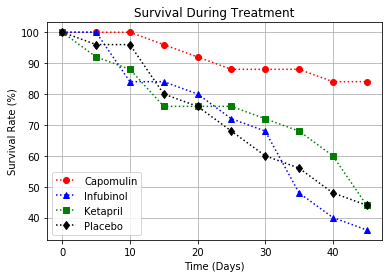

In [71]:
for i in range(len(name_list)):
    plt.plot(
        df_count_of_mice[df_count_of_mice["Drug"] == name_list[i]]["Timepoint"],
        df_count_of_mice[df_count_of_mice["Drug"] == name_list[i]]["Mouse Count"] / np.max(df_count_of_mice[df_count_of_mice["Drug"] == name_list[i]]["Mouse Count"].values) * 100,
        color_list[i] + ":" + fmt_list[i],
    )

plt.grid()
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")
plt.legend(labels=["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="lower left")

plt.savefig(os.getcwd() + "/images/survival_rate.png")
plt.show()

## Summary Bar Graph

In [72]:
name_array = df_mean_tumor_volume["Drug"].unique()
dict_to_use = dict()

for name in name_array:
    tumor_volume_array = df_mean_tumor_volume[df_mean_tumor_volume["Drug"] == name]["Tumor Volume (mm3)"].values
    dict_to_use[name] = (tumor_volume_array[-1] - tumor_volume_array[0]) / tumor_volume_array[0] * 100

series_to_use = pd.Series(dict_to_use)
series_to_use.index.name = "Drug"
series_to_use

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

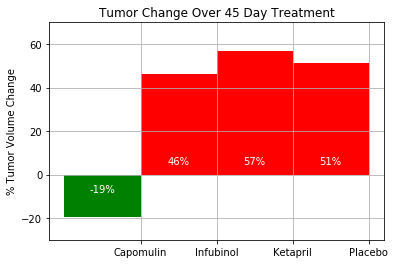

In [73]:
name_list = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
relevant_percent_changes = tuple(series_to_use[name_list])

x = 1
x_axis = np.zeros(len(name_list))

for i in range(len(name_list)):
    if relevant_percent_changes[i] >= 0:
        color = "r"
        y_text = 5
    else:
        color = "g"
        y_text = -8
    plt.bar(x, relevant_percent_changes[i], color=color, width=1)
    plt.text(x, y_text, f"{relevant_percent_changes[i]:.0f}%", ha='center', color="w")
    x_axis[i] = x
    x += 1

x_tick_locations = x_axis + 0.5
plt.xticks(x_tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])
plt.yticks(np.arange(-20, 80, 20))
plt.ylim((-30, 70))
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
plt.grid()

plt.savefig(os.getcwd() + "/images/tumor_change_bar_chart.png")
plt.show()

# Three Observed Trends of the Data:

1. The tumor volume is reduced only using Capomulin among all of the four kind of drugs used for comparison purpose.
2. The speed of metastatic spread is the slowest using Capomulin among all of the four kind of drugs used for comparison purpose.
3. More mice survived using Capomulin than the other three drugs.